In [156]:
import numpy as np
import sympy
import numba as nb
import matplotlib.pyplot as plt

In [179]:
e_max = 10
B = 2
N = 201
p = np.linspace(0, e_max, N)
delta_p = p[1] - p[0]

In [194]:
@nb.jit(nopython=True)
def F(p1, p2, p3):
    return np.array([1,0,.5,-1])

@nb.jit(nopython=True)
def create_p(p1, e_max, B, dp):
    num = int((B*e_max - p1)/dp + 1)
    return np.linspace(p1, B*e_max, num)

@nb.jit(nopython=True)
def J_1(p1, p2, p3):
    return 16/15 * p3**3 * (10*(p1+p2)**2 - 15*(p1+p2)*p3 + 6*p3**2)

@nb.jit(nopython=True)
def J_2(p1,p2):
    return 16/15 * p2**3 * (10*p1**2 + 5*p1*p2 + p2**2)

@nb.jit(nopython=True)
def J_3(p1,p2,p3):
    return 16/15 * ( (p1+p2)**5 - 10*(p1+p2)**2*p3**3 + 15*(p1+p2)*p3**4 - 6*p3**5)

## Integral 1

In [138]:
@nb.jit(nopython=True)
def A_1(p1, p2, dp):
    x = create_p(0, p2, 1, dp)
    y = np.zeros((len(x), 4))
    for i in range(len(x)):
        y[i,:] = F(p1, p2, x[i])* J_1(p1, p2, x[i])
    A = np.zeros((4))
    for i in range(4):
        A[i] = np.trapz(y[:,i], x)
    return A

In [139]:
@nb.jit(nopython=True)
def I1(p1, p, e_max, B, dp):
    x = create_p(0, p1, 1, dp)
    y = np.zeros((len(x), 4))
    output = np.zeros((4))

    for i in range(len(x)):
        y[i,:] = A_1(p1, x[i], dp)

    for k in range(4):
        output[k] = np.trapz(y[:,k],x)
    
    return output

In [140]:
p_1, p_2, p_3 = sympy.symbols('p_1, p_2, p_3')

J1 = 16/15 * p_3**3 * (10*(p_1+p_2)**2 - 15*(p_1+p_2)*p_3 + 6*p_3**2)

B_exp1 = sympy.integrate(J1, (p_3, 0, p_2))

C_exp1 = sympy.integrate(B_exp1, (p_2, 0, p_1))

C1 = sympy.lambdify((p_1), C_exp1)

In [141]:
for i in range(1, N):
    p1 = p[i]
    A_0 = I1(p1, p, e_max, B, delta_p)
    B_0 = C1(p1)
    diff = np.abs(A_0[0]-B_0) / (np.abs(A_0[0]) + np.abs(B_0) )
    print(diff)

0.6310679611650487
0.2813769668316467
0.14613321825971703
0.08734536637852068
0.057568105088894254
0.040635965680645134
0.03015426507317361
0.023238033118564986
0.01844370987910468
0.014987745572708605
0.01241629164047252
0.010452211211686503
0.008918717447299544
0.007698823673227824
0.006712660936701634
0.005904216447258165
0.005233279528363075
0.004670385933850421
0.004193551071746976
0.003786104458374085
0.003435221133140711
0.0031309052205097214
0.002865273403202401
0.002632041353916
0.0024261500337313816
0.002243489987435863
0.002080695347940425
0.0019349881222017534
0.0018040592133988002
0.0016859766030386388
0.0015791138349033327
0.0014820938303188472
0.0013937443919706204
0.001313062698694129
0.0012391867741103617
0.001171372406998727
0.001108974364971948
0.0010514310126705406
0.0009982516474013176
0.000949006017239617
0.0009033156022224441
0.0008608463277652435
0.0008608463277652199
0.0007851667737359576
0.0007506355853850644
0.0007183346545466393
0.000688075830886118
0.000659

## Integral 2

In [125]:
@nb.jit(nopython=True)
def A_2(p1, p2, dp):
    x = create_p(p2, p1, 1, dp)
    y = np.zeros((len(x), 4))
    for i in range(len(x)):
        y[i,:] = F(p1, p2, x[i])* J_2(p1, p2)
    A = np.zeros((4))
    for i in range(4):
        A[i] = np.trapz(y[:,i], x)
    return A

In [126]:
@nb.jit(nopython=True)
def I2(p1, p, e_max, B, dp):
    x = create_p(0, p1, 1, dp)
    y = np.zeros((len(x), 4))
    output = np.zeros((4))

    for i in range(len(x)):
        y[i,:] = A_2(p1, x[i], dp)

    for k in range(4):
        output[k] = np.trapz(y[:,k],x)
    
    return output

In [129]:
p_one, p_two, p_three = sympy.symbols('p_one, p_two, p_three')
J2 = 16/15 * p_two**3 * (10*p_one**2 + 5*p_two*p_one + p_two**2)

B_exp2 = sympy.integrate(J2, (p_three, p_two, p_one))

C_exp2 = sympy.integrate(B_exp2, (p_two, 0, p_one))

C2 = sympy.lambdify((p_one), C_exp2)

In [132]:
for i in range(1, N):
    p1 = p[i]
    A_0 = I2(p1, p, e_max, B, delta_p)
    B_0 = C2(p1)
    diff = np.abs(A_0[0]-B_0) / (np.abs(A_0[0]) + np.abs(B_0) )
    print(diff)

1.0
0.2681926887598226
0.1127720609521807
0.49642064154449406
0.3422199525642809
0.2491254891859781
0.189471440118633
0.14907312306767032
0.12045028488134188
0.09941803784694311
0.008010170970481824
0.0711496446308669
0.06137254183623444
0.00493780618949949
0.04705343441262259
0.0037784090760516107
0.003346270920255024
0.033457029839433945
0.0026780115723703886
0.027438480576427438
0.002191692419661503
0.0019967888892414155
0.0018267804098379904
0.001677599854822673
0.01797684637699189
0.0014292634571116637
0.0013252863686449598
0.0012322583083936773
0.001148694008317761
0.012691111972317776
0.001005187232501158
0.0009433165601115688
0.0008869880261144471
0.0008355588586283656
0.009438545043292938
0.0007452654643220589
0.0007055117235765077
0.0006688563005245264
0.000634985365596009
0.007294679515259946
0.006954496888980952
0.006637600336292181
0.0005474898159070991
0.0004988374994874618
0.005806930249171206
0.00045639397474627434
0.005336969207753234
0.005123123640928574
0.00492189151

6.939749958524804e-06
6.865923112025356e-06
6.829450689257572e-06
6.793268114276796e-06
6.757372323599769e-06
6.757372323658062e-06
6.686429044816074e-06
6.651375629497698e-06
6.616597143550073e-06
6.582090719189435e-06
6.547853526166567e-06
8.399163201299878e-05
6.480175696260258e-06
6.446729580185799e-06
6.413541735550869e-06
6.380609510283721e-06
8.186029507246298e-05
6.315501477570896e-06
6.283320533202913e-06
6.251384933247468e-06
6.219692190005069e-06
7.980906805694183e-05
6.157025479653222e-06
6.1260466927594276e-06
6.095301121657345e-06
6.064786431486823e-06
7.783398586577607e-05


## Integral 3

In [112]:
@nb.jit(nopython=True)
def A_3(p1, p2, dp):
    x = create_p(p1,p1+p2,1,dp)
    y = np.zeros((len(x), 4))
    for i in range(len(x)):
        y[i,:] = F(p1, p2, x[i])* J_3(p1, p2, x[i])
    A = np.zeros((4))
    for i in range(4):
        A[i] = np.trapz(y[:,i], x)
    return A

In [113]:
@nb.jit(nopython=True)
def I3(p1, p, e_max, B, dp):
    x = create_p(0, p1, 1, dp)
    y = np.zeros((len(x), 4))
    output = np.zeros((4))

    for i in range(len(x)):
        y[i,:] = A_3(p1,x[i],dp)

    for k in range(4):
        output[k] = np.trapz(y[:,k],x)
    
    return output

In [114]:
pone, ptwo, pthree = sympy.symbols('pone, ptwo, pthree')
J3 = 16/15 * ( (pone+ptwo)**5 - 10*(pone+ptwo)**2*pthree**3 + 15*(pone+ptwo)*pthree**4 - 6*pthree**5)

B_exp3 = sympy.integrate(J3, (pthree, pone, ptwo+pone))

C_exp3 = sympy.integrate(B_exp3, (ptwo, 0, pone))

C3 = sympy.lambdify((pone), C_exp3)

In [115]:
for i in range(1, N):
    p1 = p[i]
    A_0 = I3(p1, p, e_max, B, delta_p)
    B_0 = C3(p1)
    diff = np.abs(A_0[0]-B_0) / (np.abs(A_0[0]) + np.abs(B_0) )
    print(diff)

0.6310679611650475
0.2813769668316471
0.14613321825972023
0.08479566764396597
0.06186463548049077
0.04028061970184249
0.03088448576704897
0.024381737239995014
0.01907655813209983
0.015615240978436305
0.01280737837047287
0.010520166492202828
0.009215532000123806
0.007879956501038602
0.006884271670656969
0.0060056170678507645
0.005336228098232753
0.004763472477747753
0.0042319435887647585
0.003843429761044267
0.00348560592960679
0.003166537304298661
0.002906084781268418
0.0026361608584346426
0.0024563143452972134
0.002276789289087994
0.002098232749027265
0.0019570399987888384
0.001823846984593407
0.001702682288609003
0.0016000607542732191
0.00149114492459821
0.0014040752500410986
0.0013238068042670619
0.001248482343657508
0.001183690126754068
0.0011144829053383175
0.0010580900814987967
0.001004591321549027
0.0009545923348165122
0.0009050622530033011
0.0008654612119518713
0.0008608463277650806
0.0007893483333618612
0.0007542982823967587
0.0007223371172463104
0.0006917064695183785
0.000659

## Integral 4

In [75]:
@nb.jit(nopython=True)
def A_4(p1, p2, dp):
    x = create_p(0, p1, 1, dp)
    y = np.zeros((len(x), 4))
    for i in range(len(x)):
        y[i,:] = F(p1, p2, x[i])* J_1(p1, p2, x[i])
    A = np.zeros((4))
    for i in range(4):
        A[i] = np.trapz(y[:,i], x)
    return A

In [76]:
@nb.jit(nopython=True)
def I4(p1, p, e_max, B, dp):
    x = create_p(p1, e_max, B, dp)
    y = np.zeros((len(x), 4))
    output = np.zeros((4))

    for i in range(len(x)):
        y[i,:] = A_4(p1,x[i], dp)

    for k in range(4):
        output[k] = np.trapz(y[:,k],x)
    
    return output

In [77]:
p_1, p_2, p_3 = sympy.symbols('p_1, p_2, p_3')

J1 = 16/15 * p_3**3 * (10*(p_1+p_2)**2 - 15*(p_1+p_2)*p_3 + 6*p_3**2)

B_exp = sympy.integrate(J1, (p_3, 0, p_1))

C_exp = sympy.integrate(B_exp, (p_2, p_1, e_max*B))

C = sympy.lambdify((p_1), C_exp)

In [78]:
for i in range(1, N):
    p1 = p[i]
    A_0 = I4(p1, p, e_max, B, delta_p)
    B_0 = C(p1)
    diff = np.abs(A_0[0]-B_0) / (np.abs(A_0[0]) + np.abs(B_0) )
    print(diff)

0.33283502106687674
0.11055861641409173
0.05219890057318194
0.029959773364427032
0.019326348574144052
0.013461171617272642
0.009896196880164566
0.00757217057727949
0.005974986055226769
0.00483113635935835
0.003984433263002265
0.0033404668404489212
0.0028394971077148057
0.0024422525587058427
0.002122038859004373
0.001860225828335033
0.0016434659538520425
0.0014620195594906673
0.00130865355715576
0.00117787741899058
0.0010654891895025187
0.0009681996249055851
0.0008834309007804889
0.0008091460412841056
0.0007436885836977828
0.0006857281408841373
0.0006341560391911449
0.0005880704827239214
0.0005467372329000648
0.0005095233481594829
0.0004759098567865109
0.00044543744453983216
0.00041772781445456033
0.0003924718847185107
0.00036938486624398003
0.0003482343491175212
0.000328798770340858
0.00031089781939472576
0.0002943881244794272
0.00027912472939171267
0.0002649933822854962
0.00025187324599567273
0.0002511565564920593
0.00022831318337657302
0.00021772173609716826
0.0002078358466230005
0.0

## Integral 5

In [200]:
@nb.jit(nopython=True)
def A_5(p1, p2, dp):
    x = create_p(p1,p2,1,dp)
    y = np.zeros((len(x), 4))
    for i in range(len(x)):
        y[i,:] = F(p1, p2, x[i])* J_2(p2, p1)
    A = np.zeros((4))
    for i in range(4):
        A[i] = np.trapz(y[:,i], x)
    return A

In [204]:
@nb.jit(nopython=True)
def I5(p1, p, e_max, B, dp):
    x = create_p(p1, e_max, B, dp)
    y = np.zeros((len(x), 4))
    output = np.zeros((4))

    for i in range(len(x)):
        y[i,:] = A_5(p1,x[i], dp)

    for k in range(4):
        output[k] = np.trapz(y[:,k],x)
    
    return output

In [206]:
p_one, p_two, p_three = sympy.symbols('p_one, p_two, p_three')
J2 = 16/15 * p_one**3 * (10*p_two**2 + 5*p_one*p_two + p_one**2)

B_exp5 = sympy.integrate(J2, (p_three, p_one, p_two))

C_exp5 = sympy.integrate(B_exp5, (p_two, p_one, e_max*B))

C5 = sympy.lambdify((p_one), C_exp5)

In [207]:
for i in range(1, N):
    p1 = p[i]
    A_0 = I5(p1, p, e_max, B, delta_p)
    B_0 = C5(p1)
    diff = np.abs(A_0[0]-B_0) / (np.abs(A_0[0]) + np.abs(B_0) )
    print(diff)

3.14333765804841e-06
3.146015880069656e-06
3.131068254327934e-06
3.13264199492239e-06
3.133974805004889e-06
3.156879072036654e-06
3.1596337992583134e-06
3.136516512161803e-06
3.1368743306192915e-06
3.1517705118097604e-06
3.170816593568367e-06
3.173654634438277e-06
3.160115350867552e-06
3.1629313573412035e-06
3.1657650150583242e-06
3.1851844469462524e-06
3.1881127039477617e-06
3.1743746422787515e-06
3.126671964579515e-06
3.1802076998954753e-06
3.200017356991353e-06
3.2030428415899986e-06
3.1891028089551378e-06
3.1921077733718136e-06
3.195133172516856e-06
3.2153506372382125e-06
3.2184804932810752e-06
3.204334826812005e-06
3.2074448191701605e-06
3.210576679011862e-06
3.2312202987253836e-06
3.234461820575327e-06
3.2201063755572615e-06
3.2233286242527277e-06
3.226574207129276e-06
3.247663155146759e-06
3.251023813478915e-06
3.236453942963893e-06
3.026422406000594e-06
3.0184222470604393e-06
3.2647169427014937e-06
3.2682044044086864e-06
2.992613594446044e-06
2.983400088301201e-06
2.97387720711

## Integral 6

In [103]:
@nb.jit(nopython=True)
def A_6(p1, p2, dp):
    x = create_p(p2,p1+p2,1,dp)
    y = np.zeros((len(x), 4))
    for i in range(len(x)):
        y[i,:] = F(p1, p2, x[i])* J_3(p1, p2, x[i])
    A = np.zeros((4))
    for i in range(4):
        A[i] = np.trapz(y[:,i], x)
    return A

In [104]:
@nb.jit(nopython=True)
def I6(p1, p, e_max, B, dp):
    x = create_p(p1, e_max, B, dp)
    y = np.zeros((len(x), 4))
    output = np.zeros((4))

    for i in range(len(x)):
        y[i,:] = A_6(p1,x[i],dp)

    for k in range(4):
        output[k] = np.trapz(y[:,k],x)
    
    return output

In [105]:
pone, ptwo, pthree = sympy.symbols('pone, ptwo, pthree')
J3 = 16/15 * ( (pone+ptwo)**5 - 10*(pone+ptwo)**2*pthree**3 + 15*(pone+ptwo)*pthree**4 - 6*pthree**5)

B_exp6 = sympy.integrate(J3, (pthree, ptwo, ptwo+pone))

C_exp6 = sympy.integrate(B_exp6, (ptwo, pone, e_max*B))

C6 = sympy.lambdify((pone), C_exp6)

In [108]:
for i in range(1, N):
    p1 = p[i]
    A_0 = I6(p1, p, e_max, B, delta_p)
    B_0 = C6(p1)
    diff = np.abs(A_0[0]-B_0) / (np.abs(A_0[0]) + np.abs(B_0) )
    print(diff)

0.303514344991437
0.23838790978015775
0.08236894689365833
0.050553507523922715
0.019393342080917864
0.013892582421714534
0.011602386768374023
0.008754490882434572
0.0074303575390098275
0.004844981656993586
0.00403671656659584
0.0036424711044749114
0.0030974573532073493
0.0027988700388495184
0.0021276755050789456
0.0018813768059935372
0.0017434157218071708
0.0015565646043817606
0.0014444649870864418
0.001180856411676538
0.001075429968857169
0.0010115492968099063
0.0009277251993791272
0.0008762604934335707
0.0007454977335423007
0.0006919613790507848
0.0006562522940316946
0.0006124338213665139
0.0005838057233127982
0.0005107220213181284
0.00047998186116851105
0.0004582547139580079
0.00043253699319849157
0.0004149548684942613
0.00037022772539191227
0.00035077781578000885
0.0003364663066701852
0.00032058831475146324
0.0003090033880089751
0.00027974357149310007
0.0002663177985365482
0.0002569989011277017
0.00024623811966634115
0.00023831034559213576
0.0002181905960557275
0.000209863072152285

## Error Testing

In [163]:

def error(N, p, e_max, B, delta_p, I, C, graph):
    diff = np.zeros((N))
    for i in range(1, N):
        p1 = p[i]
        A_0 = I(p1, p, e_max, B, delta_p)
        B_0 = C(p1)
        diff[i] = np.abs(A_0[0]-B_0) / (np.abs(A_0[0]) + np.abs(B_0) )
    
    if graph == True:
        plt.semilogy(diff)
        plt.ylabel("Relative Error")
        plt.show()
    return diff
    

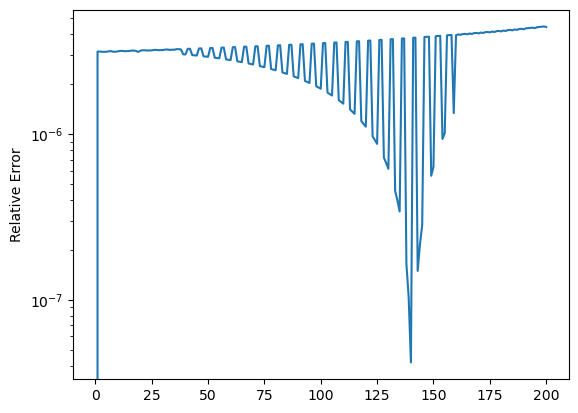

array([0.00000000e+00, 3.14333766e-06, 3.14601588e-06, 3.13106825e-06,
       3.13264199e-06, 3.13397481e-06, 3.15687907e-06, 3.15963380e-06,
       3.13651651e-06, 3.13687433e-06, 3.15177051e-06, 3.17081659e-06,
       3.17365463e-06, 3.16011535e-06, 3.16293136e-06, 3.16576502e-06,
       3.18518445e-06, 3.18811270e-06, 3.17437464e-06, 3.12667196e-06,
       3.18020770e-06, 3.20001736e-06, 3.20304284e-06, 3.18910281e-06,
       3.19210777e-06, 3.19513317e-06, 3.21535064e-06, 3.21848049e-06,
       3.20433483e-06, 3.20744482e-06, 3.21057668e-06, 3.23122030e-06,
       3.23446182e-06, 3.22010638e-06, 3.22332862e-06, 3.22657421e-06,
       3.24766316e-06, 3.25102381e-06, 3.23645394e-06, 3.02642241e-06,
       3.01842225e-06, 3.26471694e-06, 3.26820440e-06, 2.99261359e-06,
       2.98340009e-06, 2.97387721e-06, 3.28242044e-06, 3.28604260e-06,
       2.94342697e-06, 2.93264100e-06, 2.92153261e-06, 3.30081361e-06,
       3.30457862e-06, 2.88624505e-06, 2.87381883e-06, 2.86105585e-06,
      

In [208]:
error(201, p, e_max, B, delta_p, I5, C5, True)